## Iris Flowers Classification
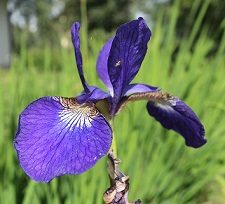

In [1]:
### Importing some libraries
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics

import plotly.express as px
import plotly.graph_objects as go

In [2]:
### Importing Dataset
df = pd.read_csv('../input/iris/Iris.csv', index_col='Id')
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


↑ There are 150 observations in this dataset, we also have 150 values for each feature. Thus, there is no *missing value* in this dataset.

In [4]:
X = df.drop('Species', axis=1)
y = df.Species

<AxesSubplot:xlabel='Species', ylabel='count'>

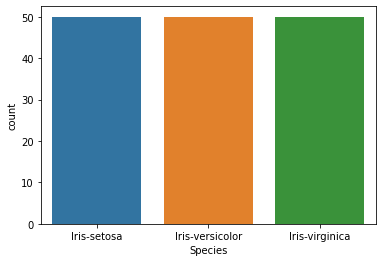

In [5]:
### Plotting countplot for each Species
sns.countplot(data=df, x='Species')

↑ There are 50 samples for each class in this balanced dataset.

<AxesSubplot:>

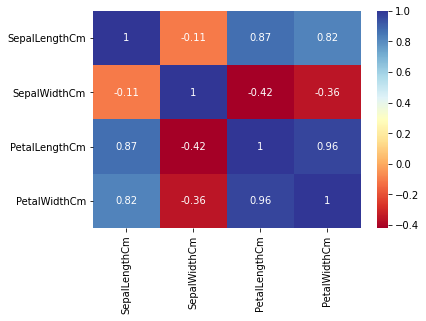

In [6]:
sns.heatmap(df.corr(),
            annot=True,
            cmap='RdYlBu')

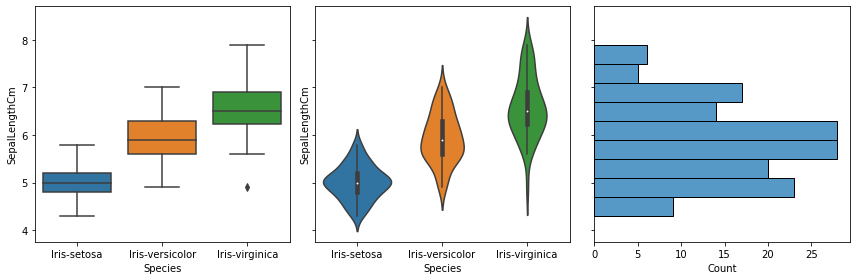

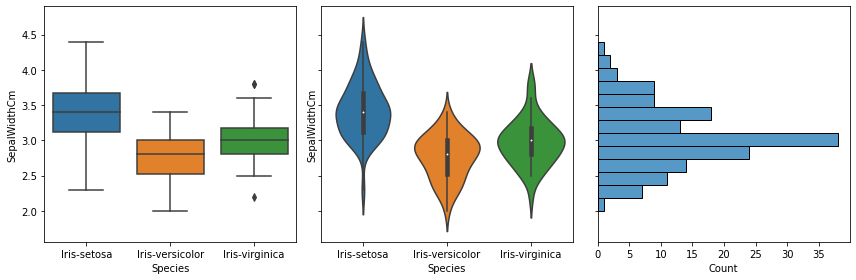

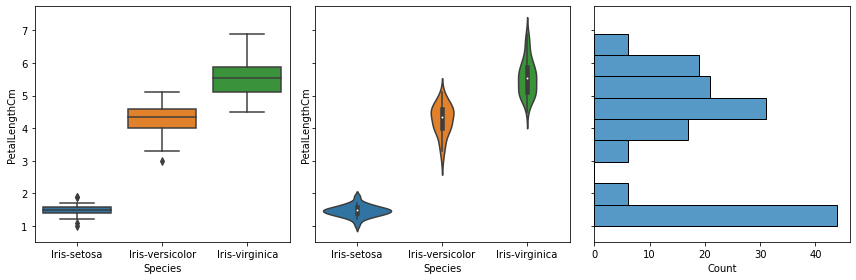

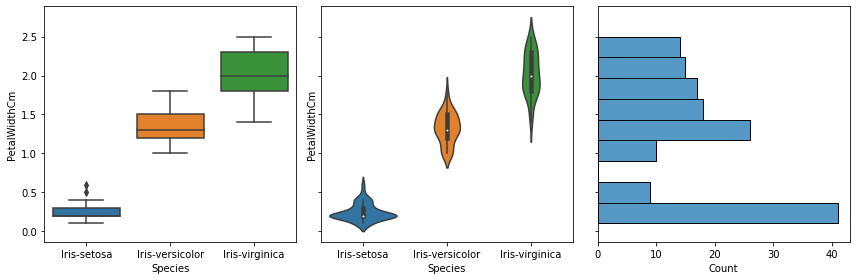

In [7]:
### Plotting feature distribution
for col in X.columns:
    fig, ax = plt.subplots(nrows=1, ncols=3,
                        sharey=True,
                        figsize=(12,4))
  
    sns.boxplot(data=df, x='Species', y=col, ax=ax[0])
    sns.violinplot(data=df, x='Species',y=col, ax=ax[1])
    sns.histplot(data=df, y=col, ax=ax[2])
    
    plt.tight_layout()
    plt.show()

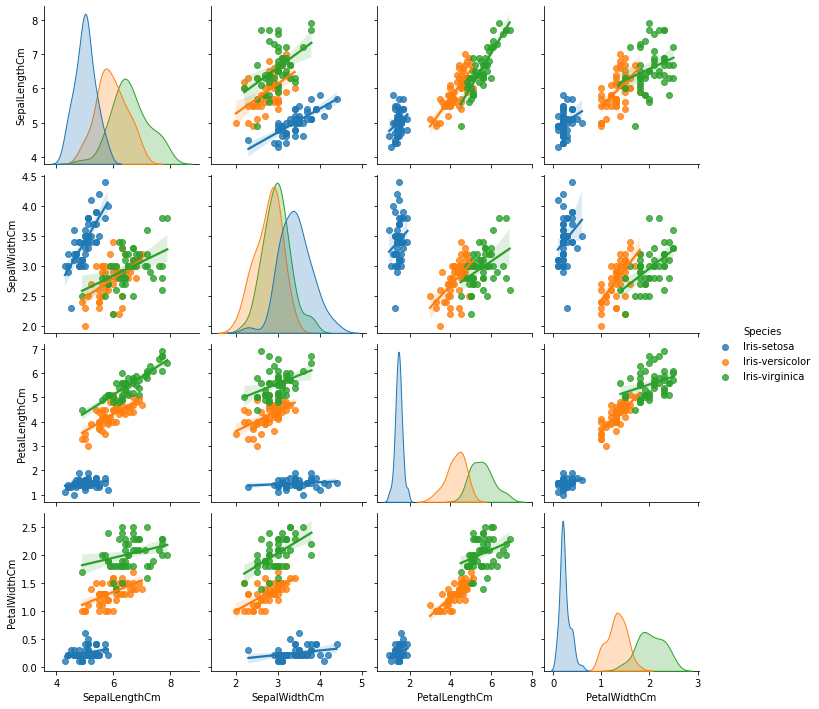

In [8]:
sns.pairplot(df, hue='Species', kind='reg')

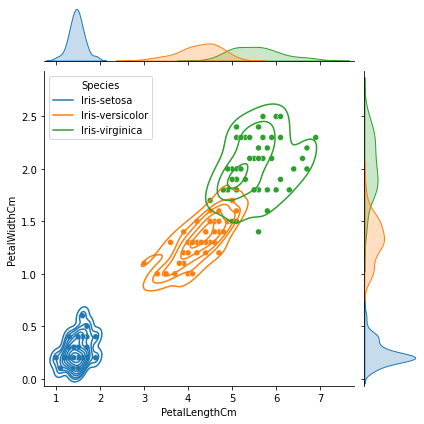

In [9]:
g=sns.jointplot(data=df,
                x='PetalLengthCm', y='PetalWidthCm',
                hue='Species')

g.plot_joint(sns.kdeplot, color="r")

↑ This graph suggests Iris-Setosa can be easily separated from the other two species by drawing a linear line. This probably is going to be the first split in our Decision Tree.

In [10]:
fig = px.scatter_3d(df,
                    x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',
                    color='Species')
fig.show()

↑ By playing with this 3D graph, we can have a better intuition of how the observations are distributed in 3D space.

In [11]:
### Plotting Radar plot
df_gb=df.groupby('Species').median().transpose().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=df_gb['Iris-setosa'],
      theta=df_gb['index'],
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=df_gb['Iris-versicolor'],
      theta=df_gb['index'],
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=df_gb['Iris-virginica'],
      theta=df_gb['index'],
      fill='toself',
      name='Product A'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 7]
    )),
  showlegend=False
)

fig.show()

↑ As can be seen in the previous plots, there is a distinct difference between classes in terms of Petal and Sepal dimensions. So, we can expect getting a fairly high score for this classification.

C:\Users\aminj\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:241: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



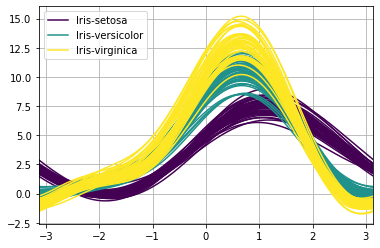

In [12]:
### Plotting Andrews curve, visualizing multivariate data by mapping into 2D space through Fourier series
pd.plotting.andrews_curves(df, 'Species', colormap='viridis')
plt.legend(loc='upper left')

<AxesSubplot:ylabel='Id'>

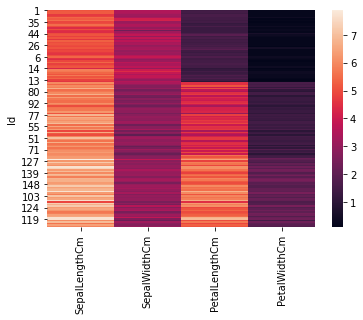

In [13]:
### Plotting a heatmap for sorted dataframe based on Species
sns.heatmap(df.sort_values('Species').drop('Species',axis=1))

### Modeling

In [14]:
### Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [15]:
### Using a single Decision Tree for this classification
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



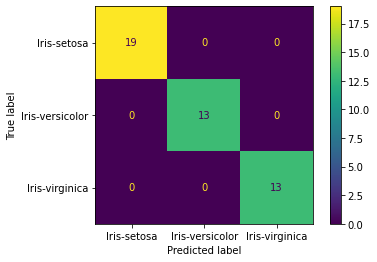

In [16]:
print(metrics.classification_report(y_pred, y_test))
metrics.plot_confusion_matrix(model, X_test, y_pred);

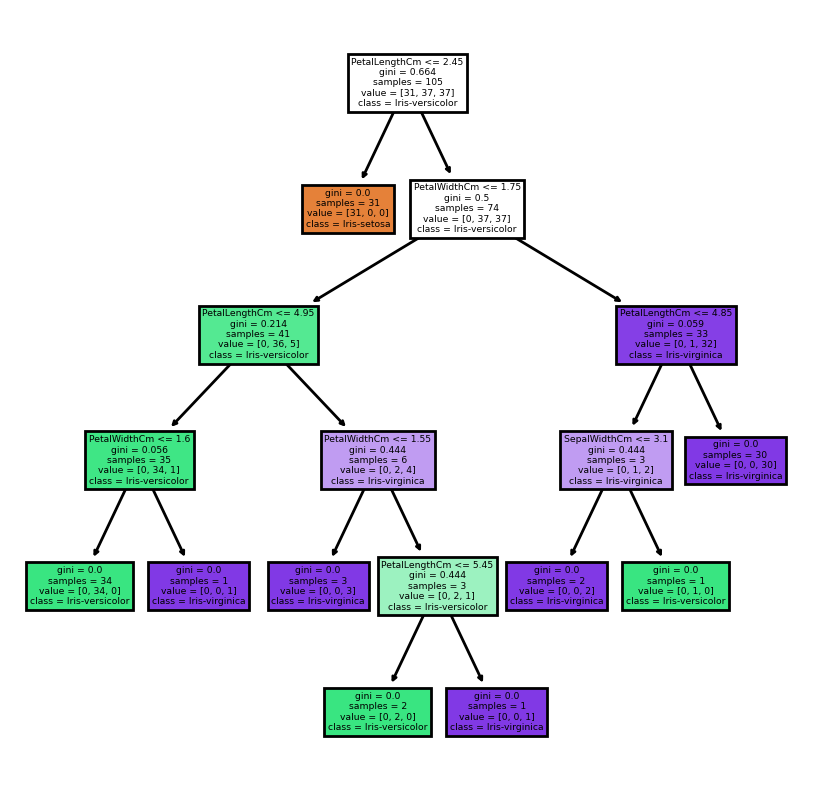

In [17]:
### Tree representation
plt.figure(figsize=(5,5), dpi=200)
tree.plot_tree(model,
               feature_names=df.columns,
               class_names=df.Species.unique(),
               filled=True)

plt.show()

In [18]:
### Text representation

txt = tree.export_text(model)
print(txt)


|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.60
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.60
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica

